# Encuestinator

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
df = pd.read_csv('sevilla-21-02-2025.csv', sep=";")
df.head(3)

,Source.Name,Marca temporal,Nombre del Encuestador SE1,Nombre de la empresa,1. Tamaño de la empresa:,2. Sector o industria principal de la empresa (seleccione una opción):,* Especificar otra industria o sector,3. ¿Qué tipo de perfiles profesionales son los más demandados por su empresa actualmente?,* Especificar otro perfil,4. ¿Cuántos puestos de trabajo necesitan cubrir en los próximos 12 meses?,5. ¿Cuáles son las principales dificultades que enfrenta para cubrir las vacantes en su empresa?,* Especificar otras dificultades,6. ¿Qué proporción de sus trabajadores considera que tiene suficiente formación?,7. ¿En qué medida la falta de personal cualificado cree que afecta al crecimiento de su empresa?,8. ¿A su empresa le interesaría realizar programas de formación o programas de inserción laboral?
0,SE1 - MARIA DEL CARMEN ROGRÍGUEZ GUERRA (respu...,18/02/2025 10:38,MARIA DEL CARMEN ROGRÍGUEZ GUERRA,Cafetería cervecería Er Migui,Pequeña,Hostelería,"Bar,cafeteria",Otro *,Camareros cualificados,1-5,"Falta de candidatos cualificados, Competencia ...",Competencia horaria,Casi todos,En cierta medida,Sí
1,SE1 - MARIA DEL CARMEN ROGRÍGUEZ GUERRA (respu...,18/02/2025 11:00,MARIA DEL CARMEN ROGRÍGUEZ GUERRA,Zapatería ortis,Pequeña,Comercio,Venta al por menor,Comerciales,Comercial venta,Ninguno,"Falta de candidatos cualificados, Falta de exp...",Ningún na mas,La mayoría,Poco,No
2,SE1 - MARIA DEL CARMEN ROGRÍGUEZ GUERRA (respu...,18/02/2025 11:07,MARIA DEL CARMEN ROGRÍGUEZ GUERRA,Bar alegria,Mediana,Hostelería,Bar,Otro *,Camareros,1-5,Falta de experiencia,Financiera,La mayoría,En cierta medida,Sí


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 15 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Source.Name                                                                                          1396 non-null   object
 1   Marca temporal                                                                                       1394 non-null   object
 2   Nombre del Encuestador SE1                                                                           12 non-null     object
 3   Nombre de la empresa                                                                                 1360 non-null   object
 4   1. Tamaño de la empresa:                                                                             1377 non-null

In [84]:
df.rename(columns={
    "Source.Name": "origen",
    "Marca temporal": "fecha",
    "Nombre del Encuestador SE1": "encuestador",
    "Nombre de la empresa": "empresa",
    "1. Tamaño de la empresa:": "size",
    "2. Sector o industria principal de la empresa (seleccione una opción):  ": "sector",
    '* Especificar otra industria o sector': 'otro_sector',
    '3. ¿Qué tipo de perfiles profesionales son los más demandados por su empresa actualmente?  ': 'perfil',
    '* Especificar otro perfil': 'otro_perfil',
    '4. ¿Cuántos puestos de trabajo necesitan cubrir en los próximos 12 meses?   ': 'puestos',
    '5. ¿Cuáles son las principales dificultades que enfrenta para cubrir las vacantes en su empresa?  ': 'dificultades',
    '* Especificar otras dificultades': 'otras_dificultades',
    '6. ¿Qué proporción de sus trabajadores considera que tiene suficiente formación?': 'formacion',
    '7. ¿En qué medida la falta de personal cualificado cree que afecta al crecimiento de su empresa?  ': 'afecta',
    '8. ¿A su empresa le interesaría realizar programas de formación o programas de inserción laboral?  ': 'interes'
}, inplace=True)

In [119]:
df.info()
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y %H:%M')
df['fecha_sola'] = df['fecha'].dt.date
df['fecha_sola'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').dt.date
df['fecha_sola']

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   origen              1360 non-null   object        
 1   fecha               1360 non-null   datetime64[ns]
 2   encuestador         1360 non-null   object        
 3   empresa             1360 non-null   object        
 4   size                1356 non-null   object        
 5   sector              1332 non-null   object        
 6   otro_sector         320 non-null    object        
 7   perfil              1345 non-null   object        
 8   otro_perfil         681 non-null    object        
 9   puestos             1354 non-null   object        
 10  dificultades        1340 non-null   object        
 11  otras_dificultades  325 non-null    object        
 12  formacion           1344 non-null   object        
 13  afecta              1353 non-null   object        
 1

0       2025-02-18
1       2025-02-18
2       2025-02-18
3       2025-02-18
4       2025-02-18
           ...    
1391    2025-02-20
1392    2025-02-20
1393    2025-02-20
1394    2025-02-20
1395    2025-02-20
Name: fecha_sola, Length: 1360, dtype: object

In [76]:
df.isna().sum()

origen                         0
fecha                          0
encuestador                    0
empresa                        0
1. Tamaño de la empresa:       4
sector                        28
otro_sector                 1040
perfil                        15
otro_perfil                  679
puestos                        6
dificultades                  20
otras_dificultades          1035
formacion                     16
afecta                         7
interes                        8
nombre_extraido                0
dtype: int64

In [113]:
df['nombre_extraido'] = df['origen'].str.extract(r'- (.*?)\(')[0].str.strip()
df['nombre_extraido'] = df['origen'].str.extract(r'-(.*?)\(')[0].str.strip()
df['encuestador'] = df['encuestador'].fillna(df['nombre_extraido'])
df.dropna(subset=['fecha'], inplace=True)
df.dropna(subset=['empresa'], inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 0 to 1395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   origen              1360 non-null   object        
 1   fecha               1360 non-null   datetime64[ns]
 2   encuestador         1360 non-null   object        
 3   empresa             1360 non-null   object        
 4   size                1356 non-null   object        
 5   sector              1332 non-null   object        
 6   otro_sector         320 non-null    object        
 7   perfil              1345 non-null   object        
 8   otro_perfil         681 non-null    object        
 9   puestos             1354 non-null   object        
 10  dificultades        1340 non-null   object        
 11  otras_dificultades  325 non-null    object        
 12  formacion           1344 non-null   object        
 13  afecta              1353 non-null   object        
 1

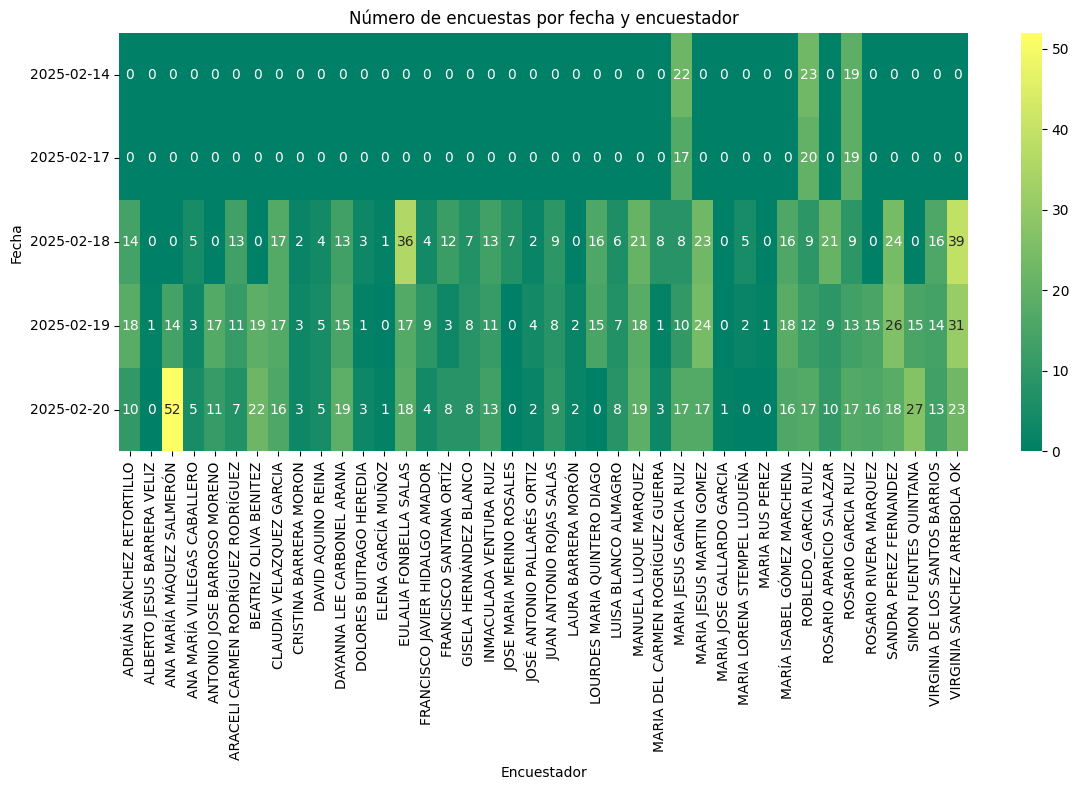

In [126]:
df_grouped = df.groupby(['fecha_sola', 'encuestador']).size().reset_index(name='count')

df_pivot = df_grouped.pivot(index='fecha_sola', columns='encuestador', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt='g', cmap='summer')  # 'annot=True' muestra los números
plt.title('Número de encuestas por fecha y encuestador')
plt.xlabel('Encuestador')
plt.ylabel('Fecha')
plt.xticks(rotation=90)  # Rotar etiquetas del eje X si es necesario
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()